In [39]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/insurancecoverage/InsuranceCoverage.csv
/kaggle/input/new-york-city-census-data/nyc_census_tracts.csv
/kaggle/input/new-york-city-census-data/census_block_loc.csv


In [40]:
df= pd.read_csv('../input/new-york-city-census-data/nyc_census_tracts.csv')
df.shape

(2167, 36)

In [41]:
#total NaN values
df.isna().sum().sum()

1269

In [42]:
#Find constant features
def find_constant_features(dataFrame):
    const_features = []
    for column in list(dataFrame.columns):
        if dataFrame[column].unique().size < 2:
            const_features.append(column)
    return const_features
const_features = find_constant_features(df)
print(const_features)

[]


In [43]:
newdf=df.dropna(how='all')
newdf.shape

(2167, 36)

In [44]:
print(list(df.columns),len(list(df.columns)))

['CensusTract', 'County', 'Borough', 'TotalPop', 'Men', 'Women', 'Hispanic', 'White', 'Black', 'Native', 'Asian', 'Citizen', 'Income', 'IncomeErr', 'IncomePerCap', 'IncomePerCapErr', 'Poverty', 'ChildPoverty', 'Professional', 'Service', 'Office', 'Construction', 'Production', 'Drive', 'Carpool', 'Transit', 'Walk', 'OtherTransp', 'WorkAtHome', 'MeanCommute', 'Employed', 'PrivateWork', 'PublicWork', 'SelfEmployed', 'FamilyWork', 'Unemployment'] 36


In [45]:
#3. Remove duplicate features.
'''Duplicate features are those have the same value in multiple features with the same/different name.
To find out the duplicate features, we use this function.
'''
def duplicate_columns(frame):
    groups = frame.columns.to_series().groupby(frame.dtypes).groups
    dups = []
    for t, v in groups.items():
        cs = frame[v].columns
        vs = frame[v]
        lcs = len(cs)
        for i in range(lcs):
            ia = vs.iloc[:,i].values
            for j in range(i+1, lcs):
                ja = vs.iloc[:,j].values
                if np.array_equal(ia, ja):
                    dups.append(cs[i])
                    break
    return dups
duplicate_cols = duplicate_columns(df)
print(duplicate_cols)

[]


In [46]:
for col in list(df.columns):
    print(col,df[col].isna().sum())
    

CensusTract 0
County 0
Borough 0
TotalPop 0
Men 0
Women 0
Hispanic 39
White 39
Black 39
Native 39
Asian 39
Citizen 0
Income 66
IncomeErr 66
IncomePerCap 46
IncomePerCapErr 46
Poverty 42
ChildPoverty 60
Professional 43
Service 43
Office 43
Construction 43
Production 43
Drive 43
Carpool 43
Transit 43
Walk 43
OtherTransp 43
WorkAtHome 43
MeanCommute 61
Employed 0
PrivateWork 43
PublicWork 43
SelfEmployed 43
FamilyWork 43
Unemployment 42


In [47]:
tract0=df[df['TotalPop']>0]
tract0.shape
temp=tract0[tract0.isnull().sum(axis=1)<10]
print(temp[temp.columns[0:15]])

      CensusTract    County        Borough  TotalPop   Men  Women  Hispanic  \
1     36005000200     Bronx          Bronx      5403  2659   2744      75.8   
2     36005000400     Bronx          Bronx      5915  2896   3019      62.7   
3     36005001600     Bronx          Bronx      5879  2558   3321      65.1   
4     36005001900     Bronx          Bronx      2591  1206   1385      55.4   
5     36005002000     Bronx          Bronx      8516  3301   5215      61.1   
...           ...       ...            ...       ...   ...    ...       ...   
2161  36085030301  Richmond  Staten Island      4895  2371   2524      30.7   
2162  36085030302  Richmond  Staten Island      6279  3093   3186      35.8   
2163  36085031901  Richmond  Staten Island      2550   953   1597      27.1   
2164  36085031902  Richmond  Staten Island      4611  2043   2568      20.9   
2165  36085032300  Richmond  Staten Island      1131   597    534      45.5   

      White  Black  Native  Asian  Citizen   Income

In [48]:
for col in list(tract0.columns):
    print(col,tract0[col].isna().sum())

CensusTract 0
County 0
Borough 0
TotalPop 0
Men 0
Women 0
Hispanic 0
White 0
Black 0
Native 0
Asian 0
Citizen 0
Income 27
IncomeErr 27
IncomePerCap 7
IncomePerCapErr 7
Poverty 3
ChildPoverty 21
Professional 4
Service 4
Office 4
Construction 4
Production 4
Drive 4
Carpool 4
Transit 4
Walk 4
OtherTransp 4
WorkAtHome 4
MeanCommute 22
Employed 0
PrivateWork 4
PublicWork 4
SelfEmployed 4
FamilyWork 4
Unemployment 3


In [49]:
for col in list(temp.columns):
    print(col,temp[col].isna().sum())
print(temp.shape)

CensusTract 0
County 0
Borough 0
TotalPop 0
Men 0
Women 0
Hispanic 0
White 0
Black 0
Native 0
Asian 0
Citizen 0
Income 23
IncomeErr 23
IncomePerCap 6
IncomePerCapErr 6
Poverty 0
ChildPoverty 17
Professional 0
Service 0
Office 0
Construction 0
Production 0
Drive 0
Carpool 0
Transit 0
Walk 0
OtherTransp 0
WorkAtHome 0
MeanCommute 18
Employed 0
PrivateWork 0
PublicWork 0
SelfEmployed 0
FamilyWork 0
Unemployment 0
(2124, 36)


In [50]:
insdf= pd.read_csv('../input/insurancecoverage/InsuranceCoverage.csv')
insdf.shape

(4918, 3)

In [51]:
l=insdf.CensusTract.tolist()
new_val=list()
for i in l:
    k=i.index('S')
    i=i[k+1::]
    new_val.append(int(i))
insdf['CensusTract']=new_val

In [52]:
insdf.head()

,CensusTract,NoIns18ab,NoIns18bel
0,36047004600,1.1,0
1,36047004700,5.9,1.2
2,36047004900,4.4,0
3,36047005000,8.7,5
4,36047005100,7.7,0


In [53]:
finaldf=pd.merge(left=temp, right=insdf, left_on='CensusTract', right_on='CensusTract')
finaldf.head()

,CensusTract,County,Borough,TotalPop,Men,Women,Hispanic,White,Black,Native,...,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment,NoIns18ab,NoIns18bel
0,36005000200,Bronx,Bronx,5403,2659,2744,75.8,2.3,16.0,0.0,...,0.0,43.0,2308,80.8,16.2,2.9,0.0,7.7,9.6,4.6
1,36005000400,Bronx,Bronx,5915,2896,3019,62.7,3.6,30.7,0.0,...,2.1,45.0,2675,71.7,25.3,2.5,0.6,9.5,7.5,1.3
2,36005001600,Bronx,Bronx,5879,2558,3321,65.1,1.6,32.4,0.0,...,1.7,38.8,2120,75.0,21.3,3.8,0.0,8.7,9.9,1.8
3,36005001900,Bronx,Bronx,2591,1206,1385,55.4,9.0,29.0,0.0,...,6.2,45.4,1083,76.8,15.5,7.7,0.0,19.2,20.8,6
4,36005002000,Bronx,Bronx,8516,3301,5215,61.1,1.6,31.1,0.3,...,0.0,46.0,2508,71.0,21.3,7.7,0.0,17.2,11.1,2.9


In [54]:
for col in list(finaldf.columns):
    print(col,finaldf[col].isna().sum())
print(finaldf.shape)

CensusTract 0
County 0
Borough 0
TotalPop 0
Men 0
Women 0
Hispanic 0
White 0
Black 0
Native 0
Asian 0
Citizen 0
Income 23
IncomeErr 23
IncomePerCap 6
IncomePerCapErr 6
Poverty 0
ChildPoverty 17
Professional 0
Service 0
Office 0
Construction 0
Production 0
Drive 0
Carpool 0
Transit 0
Walk 0
OtherTransp 0
WorkAtHome 0
MeanCommute 18
Employed 0
PrivateWork 0
PublicWork 0
SelfEmployed 0
FamilyWork 0
Unemployment 0
NoIns18ab 0
NoIns18bel 0
(2124, 38)


In [55]:
finaldf['NoIns18ab']=finaldf['NoIns18ab'].astype(float)

finaldf['NoIns18bel']=pd.to_numeric(finaldf['NoIns18bel'], errors='coerce')

In [56]:
finaldf.dtypes

CensusTract          int64
County              object
Borough             object
TotalPop             int64
Men                  int64
Women                int64
Hispanic           float64
White              float64
Black              float64
Native             float64
Asian              float64
Citizen              int64
Income             float64
IncomeErr          float64
IncomePerCap       float64
IncomePerCapErr    float64
Poverty            float64
ChildPoverty       float64
Professional       float64
Service            float64
Office             float64
Construction       float64
Production         float64
Drive              float64
Carpool            float64
Transit            float64
Walk               float64
OtherTransp        float64
WorkAtHome         float64
MeanCommute        float64
Employed             int64
PrivateWork        float64
PublicWork         float64
SelfEmployed       float64
FamilyWork         float64
Unemployment       float64
NoIns18ab          float64
N

In [57]:
for col in list(finaldf.columns):
    print(col,finaldf[col].isna().sum())
print(finaldf.shape)

CensusTract 0
County 0
Borough 0
TotalPop 0
Men 0
Women 0
Hispanic 0
White 0
Black 0
Native 0
Asian 0
Citizen 0
Income 23
IncomeErr 23
IncomePerCap 6
IncomePerCapErr 6
Poverty 0
ChildPoverty 17
Professional 0
Service 0
Office 0
Construction 0
Production 0
Drive 0
Carpool 0
Transit 0
Walk 0
OtherTransp 0
WorkAtHome 0
MeanCommute 18
Employed 0
PrivateWork 0
PublicWork 0
SelfEmployed 0
FamilyWork 0
Unemployment 0
NoIns18ab 0
NoIns18bel 15
(2124, 38)


In [58]:
import seaborn as sns
import matplotlib.pyplot as plt

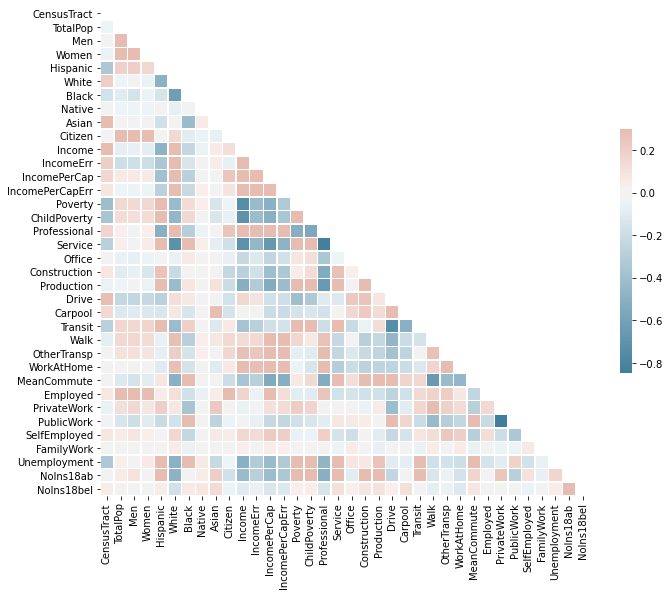

In [59]:
corr = finaldf.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [60]:
corr

,CensusTract,TotalPop,Men,Women,Hispanic,White,Black,Native,Asian,Citizen,...,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment,NoIns18ab,NoIns18bel
CensusTract,1.000000,-0.036019,-0.015249,-0.053126,-0.341535,0.197219,-0.162370,0.002132,0.344023,0.015396,...,-0.031732,-0.030124,0.069622,-0.053285,0.010242,0.075404,0.013390,-0.335516,0.013988,0.048808
TotalPop,-0.036019,1.000000,0.983214,0.987292,0.183386,-0.033704,-0.095449,-0.037542,-0.003468,0.926418,...,-0.002313,-0.121453,0.916119,0.116573,-0.142351,0.055694,0.018318,0.036300,0.054220,-0.010011
Men,-0.015249,0.983214,1.000000,0.941724,0.205972,-0.013954,-0.150463,-0.039282,0.025784,0.893239,...,-0.003030,-0.148159,0.912194,0.153331,-0.190684,0.080102,0.021387,0.005882,0.102045,-0.007327
Women,-0.053126,0.987292,0.941724,1.000000,0.158703,-0.049986,-0.044923,-0.035001,-0.028852,0.929999,...,-0.001626,-0.094806,0.894502,0.081371,-0.096364,0.032913,0.015145,0.061801,0.011084,-0.012069
Hispanic,-0.341535,0.183386,0.205972,0.158703,1.000000,-0.494459,-0.149347,-0.008801,-0.175773,-0.012048,...,-0.106567,0.089440,0.051887,0.203477,-0.208659,0.027727,-0.020465,0.325610,0.508636,0.047162
White,0.197219,-0.033704,-0.013954,-0.049986,-0.494459,1.000000,-0.624036,-0.069547,-0.011830,0.139593,...,0.279551,-0.497846,0.107348,0.075496,-0.161453,0.162553,0.054112,-0.493700,-0.485686,-0.170337
Black,-0.162370,-0.095449,-0.150463,-0.044923,-0.149347,-0.624036,1.000000,0.011881,-0.431431,-0.092429,...,-0.145953,0.439870,-0.169966,-0.366055,0.477862,-0.234275,-0.050472,0.378272,-0.010200,0.058773
Native,0.002132,-0.037542,-0.039282,-0.035001,-0.008801,-0.069547,0.011881,1.000000,0.054292,-0.047512,...,-0.002274,0.012938,-0.058155,-0.007657,-0.008275,0.029734,-0.005353,0.062961,0.051526,0.072469
Asian,0.344023,-0.003468,0.025784,-0.028852,-0.175773,-0.011830,-0.431431,0.054292,1.000000,-0.062998,...,-0.099676,-0.016278,0.039928,0.234582,-0.258638,0.061400,0.021708,-0.217956,0.198161,0.131756
Citizen,0.015396,0.926418,0.893239,0.929999,-0.012048,0.139593,-0.092429,-0.047512,-0.062998,1.000000,...,0.068223,-0.197039,0.918229,0.017732,-0.043424,0.047617,0.019790,-0.036542,-0.168414,-0.044146


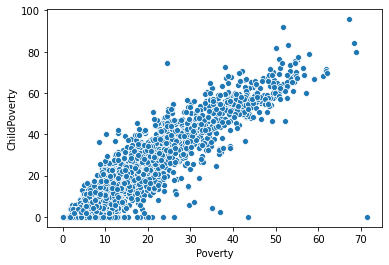

In [61]:
sns.scatterplot(data=tract0,x='Poverty', y='ChildPoverty')

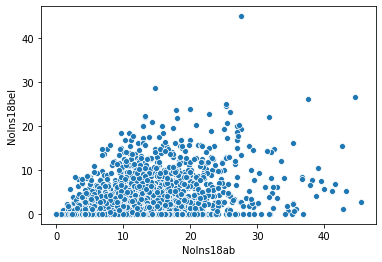

In [62]:
sns.scatterplot(data=finaldf,x='NoIns18ab', y='NoIns18bel')

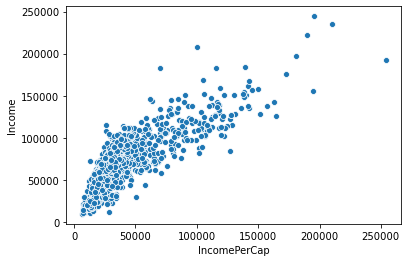

In [63]:
sns.scatterplot(data=tract0,x='IncomePerCap', y='Income')

In [64]:
from sklearn.linear_model import LinearRegression

In [65]:
regdf = finaldf[finaldf['ChildPoverty'].isna()==False]


In [66]:
for col in list(regdf.columns):
    print(col,regdf[col].isna().sum())
print(regdf.shape)

CensusTract 0
County 0
Borough 0
TotalPop 0
Men 0
Women 0
Hispanic 0
White 0
Black 0
Native 0
Asian 0
Citizen 0
Income 10
IncomeErr 10
IncomePerCap 0
IncomePerCapErr 0
Poverty 0
ChildPoverty 0
Professional 0
Service 0
Office 0
Construction 0
Production 0
Drive 0
Carpool 0
Transit 0
Walk 0
OtherTransp 0
WorkAtHome 0
MeanCommute 7
Employed 0
PrivateWork 0
PublicWork 0
SelfEmployed 0
FamilyWork 0
Unemployment 0
NoIns18ab 0
NoIns18bel 0
(2107, 38)


In [67]:
x=np.array(regdf['Poverty']).reshape(-1,1)
y=np.array(regdf['ChildPoverty'])
model=LinearRegression().fit(x, y)

In [68]:
print("R-squared: ",model.score(x,y))
print("Intercept(b0): ",model.intercept_)
print("Coefficient: ",model.coef_)

R-squared:  0.8302374811407195
Intercept(b0):  -1.740919862315053
Coefficient:  [1.34464879]


In [69]:
filldf=finaldf.copy()
filldf.ChildPoverty.fillna((model.intercept_)+filldf['Poverty']*(model.coef_), inplace=True)

In [70]:
finaldf[finaldf['ChildPoverty'].isna()]

,CensusTract,County,Borough,TotalPop,Men,Women,Hispanic,White,Black,Native,...,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment,NoIns18ab,NoIns18bel
223,36005031900,Bronx,Bronx,645,163,482,19.4,69.0,6.5,0.0,...,6.5,20.3,216,88.4,11.6,0.0,0.0,13.3,8.1,NaN
885,36047070202,Kings,Brooklyn,16,9,7,0.0,100.0,0.0,0.0,...,0.0,NaN,16,81.3,18.8,0.0,0.0,0.0,0.0,NaN
951,36047085200,Kings,Brooklyn,8,0,8,0.0,0.0,100.0,0.0,...,0.0,NaN,8,100.0,0.0,0.0,0.0,0.0,0.0,NaN
1175,36061009400,New York,Manhattan,15,11,4,0.0,73.3,0.0,0.0,...,0.0,NaN,7,100.0,0.0,0.0,0.0,0.0,0.0,NaN
1195,36061011300,New York,Manhattan,126,96,30,4.8,19.0,15.1,0.0,...,3.7,17.9,108,95.4,4.6,0.0,0.0,0.0,7.1,NaN
1202,36061011900,New York,Manhattan,1068,699,369,23.6,35.5,35.4,0.0,...,15.6,16.5,379,79.9,2.1,17.9,0.0,12.9,3.3,NaN
1304,36061021703,New York,Manhattan,8,0,8,0.0,100.0,0.0,0.0,...,100.0,NaN,4,100.0,0.0,0.0,0.0,0.0,0.0,NaN
1330,36061024000,New York,Manhattan,1688,1444,244,23.6,19.3,51.0,0.4,...,0.0,45.2,170,86.5,13.5,0.0,0.0,52.1,15.8,0.0
1399,36081005000,Queens,Queens,37,37,0,48.6,51.4,0.0,0.0,...,0.0,46.8,37,51.4,10.8,37.8,0.0,0.0,0.0,NaN
1526,36081021900,Queens,Queens,4,0,4,0.0,100.0,0.0,0.0,...,0.0,NaN,4,100.0,0.0,0.0,0.0,0.0,0.0,NaN


In [71]:
ser=filldf[filldf['CensusTract']==36005031900]
ser[ser.columns[5:20]]

,Women,Hispanic,White,Black,Native,Asian,Citizen,Income,IncomeErr,IncomePerCap,IncomePerCapErr,Poverty,ChildPoverty,Professional,Service
223,482,19.4,69.0,6.5,0.0,3.1,644,NaN,NaN,6249.0,5116.0,84.3,111.612973,20.8,32.9


In [72]:
finaldf['IncomePerCap'].fillna(finaldf['IncomePerCap'].mean(),inplace=True)
filldf['IncomePerCap'].fillna(filldf['IncomePerCap'].mean(),inplace=True)
Incomereg = finaldf[finaldf['Income'].isna()==False]
Insurreg =  finaldf[finaldf['NoIns18bel'].isna()==False]

In [73]:
x=np.array(Incomereg['IncomePerCap']).reshape(-1,1)
y=np.array(Incomereg['Income'])
Incomemodel=LinearRegression().fit(x, y)
print("R-squared: ",Incomemodel.score(x,y))
print("Intercept(b0): ",Incomemodel.intercept_)
print("Coefficient: ",Incomemodel.coef_)

R-squared:  0.6950236090165943
Intercept(b0):  28085.966703863593
Coefficient:  [0.96861825]


In [74]:
filldf.Income.fillna((Incomemodel.intercept_)+filldf['IncomePerCap']*(Incomemodel.coef_), inplace=True)

In [75]:
x=np.array(Insurreg['NoIns18ab']).reshape(-1,1)
y=np.array(Insurreg['NoIns18bel'])
Insurmodel=LinearRegression().fit(x, y)
print("R-squared: ",Insurmodel.score(x,y))
print("Intercept(b0): ",Insurmodel.intercept_)
print("Coefficient: ",Insurmodel.coef_)

R-squared:  0.13882118998175474
Intercept(b0):  0.7460797502027474
Coefficient:  [0.23757905]


In [76]:
for col in list(filldf.columns):
    print(col,filldf[col].isna().sum())
print(filldf.shape)

CensusTract 0
County 0
Borough 0
TotalPop 0
Men 0
Women 0
Hispanic 0
White 0
Black 0
Native 0
Asian 0
Citizen 0
Income 0
IncomeErr 23
IncomePerCap 0
IncomePerCapErr 6
Poverty 0
ChildPoverty 0
Professional 0
Service 0
Office 0
Construction 0
Production 0
Drive 0
Carpool 0
Transit 0
Walk 0
OtherTransp 0
WorkAtHome 0
MeanCommute 18
Employed 0
PrivateWork 0
PublicWork 0
SelfEmployed 0
FamilyWork 0
Unemployment 0
NoIns18ab 0
NoIns18bel 15
(2124, 38)


In [78]:
filldf.drop(['IncomeErr','IncomePerCapErr','MeanCommute','NoIns18bel'],axis=1,inplace=True)
for col in list(filldf.columns):
    print(col,filldf[col].isna().sum())
print(filldf.shape)

CensusTract 0
County 0
Borough 0
TotalPop 0
Men 0
Women 0
Hispanic 0
White 0
Black 0
Native 0
Asian 0
Citizen 0
Income 0
IncomePerCap 0
Poverty 0
ChildPoverty 0
Professional 0
Service 0
Office 0
Construction 0
Production 0
Drive 0
Carpool 0
Transit 0
Walk 0
OtherTransp 0
WorkAtHome 0
Employed 0
PrivateWork 0
PublicWork 0
SelfEmployed 0
FamilyWork 0
Unemployment 0
NoIns18ab 0
(2124, 34)


In [ ]:
filldf.to_csv("./NYCdata.csv")